Importing libraries

In [3]:
import imagej
import numpy as np
import matplotlib.pyplot as plt

# initialize ImageJ
ij = imagej.init('sc.fiji:fiji:2.14.0')
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.14.0/1.54f


Defining preprocessing function

In [4]:
def tif_preprocessing(n): #Returns cleaned up image as NumPy array
    
    original = np.asarray(ij.py.from_java(n))

    ij.IJ.run(n, "Convert to Mask", '10.06')

    for i in range(3):
        ij.IJ.run(n, "Despeckle", "")

    noisy = np.asarray(ij.py.from_java(n))

    for i in range(1):
        ij.IJ.run(n, "Subtract Background...", "rolling=2")

    noise = np.asarray(ij.py.from_java(n))

    cleaned_up = noisy - noise

    binary_mask = cleaned_up / 255 # White pixels get value 1 - Black pixels get value 0
    final = binary_mask * original

    rows = cleaned_up.shape[0]
    cutoff = int(rows * 0.934)  
    final = final[:cutoff, :]

    return final 

Operating in headless mode - the original ImageJ will have limited functionality.
Operating in headless mode - the IJ class will not be fully functional.


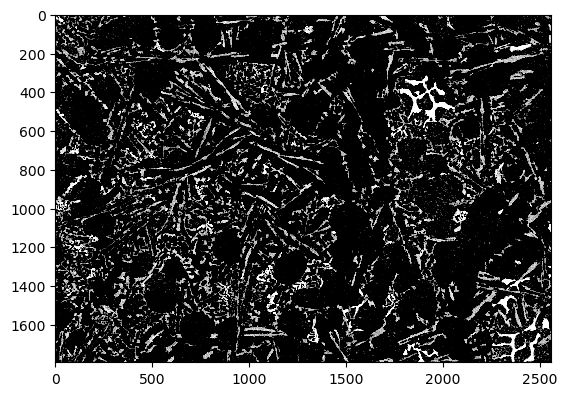

In [5]:
imp = ij.IJ.openImage("C:/Users/magfa/Documents/Prosjekt/Prosjektbilder/SEM Fe tilsetning og kjølerate/6ps/BSE_x250_m007.tif")

ij.py.show(tif_preprocessing(imp), cmap='Grays_r')